In [1]:
import pandas as pd
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Sub = pd.read_pickle("WSBSubmissonsdata_new.pkl")

In [3]:
Comm = pd.read_pickle("Commentsdata_new.pkl")

In [4]:
Sub.head(10)

,id,title,body,score,time_created,flair,num_comments,hold_score,subjectivity,polarity,num_top_comments,title_length,body_length,upvote_ratio
l8rf4k,l8rf4k,times square right now,,413085,1612029638.0,YOLO,12483,0.0,0.0,0.0,68.0,22.0,0.0,0.98
l6wu59,l6wu59,upvote so everyone sees we got support,,315560,1611841234.0,News,12840,0.0,0.0,0.0,80.0,38.0,0.0,0.97
l78uct,l78uct,gme yolo update — jan 28 2021,,280976,1611867983.0,YOLO,23681,0.0,0.0,0.0,111.0,29.0,0.0,0.97
l846a1,l846a1,gme yolo month-end update — jan 2021,,252031,1611954285.0,YOLO,20563,0.0,0.0,0.0,106.0,36.0,0.0,0.97
l6x130,l6x130,class action against robinhood. allowing peopl...,leave robinhood. they dont deserve to make mon...,222152,1611841751.0,Discussion,18325,0.0,0.0,0.0,69.0,291.0,183.0,0.97
lnqgz8,lnqgz8,gme yolo update — feb 19 2021,,216214,1613768755.0,YOLO,13203,0.0,0.0,0.0,188.0,29.0,0.0,0.95
l6ekdz,l6ekdz,gme yolo update — jan 27 2021 ----------------...,,211182,1611782135.0,YOLO,15178,0.0,0.0,0.0,114.0,110.0,0.0,0.96
lae6j0,lae6j0,gme yolo update — feb 1 2021,,210796,1612213656.0,YOLO,18671,0.0,0.0,0.0,151.0,28.0,0.0,0.95
l8c0u4,l8c0u4,used some of my gme tendies to buy nintendo sw...,,210747,1611975220.0,News,7171,0.0,0.0,0.0,38.0,168.0,0.0,0.92
lexy8t,lexy8t,wow super bowl commercial for us,,195853,1612738730.0,News,3805,0.0,0.0,0.0,88.0,32.0,0.0,0.88


In [5]:
Comm.head()

,id,parent_id,time_created,body,score,compound_sentiment,sub_id,time_since_sub
gle2wqt,gle2wqt,t3_l8rf4k,1612030478.0,bro wtf... 2021 is crazy.,7783,-0.3400,l8rf4k,840.0
gle3n41,gle3n41,t3_l8rf4k,1612030813.0,someone needs to open a gamestop across the ny...,567,0.0000,l8rf4k,1175.0
gle1mvf,gle1mvf,t3_l8rf4k,1612029897.0,this is the hype we need for next week!\n\nwe ...,9318,0.5882,l8rf4k,259.0
gle1nwd,gle1nwd,t3_l8rf4k,1612029911.0,this is easily one of the greatest things to h...,23203,0.7650,l8rf4k,273.0
gle391u,gle391u,t3_l8rf4k,1612030636.0,just when you think this sub can't be any dumb...,29103,0.2755,l8rf4k,998.0


In [6]:
Sub['total_length'] = Sub['title_length'] + Sub['body_length']

In [7]:
Sub.head(5)

,id,title,body,score,time_created,flair,num_comments,hold_score,subjectivity,polarity,num_top_comments,title_length,body_length,upvote_ratio,total_length
l8rf4k,l8rf4k,times square right now,,413085,1612029638.0,YOLO,12483,0.0,0.0,0.0,68.0,22.0,0.0,0.98,22.0
l6wu59,l6wu59,upvote so everyone sees we got support,,315560,1611841234.0,News,12840,0.0,0.0,0.0,80.0,38.0,0.0,0.97,38.0
l78uct,l78uct,gme yolo update — jan 28 2021,,280976,1611867983.0,YOLO,23681,0.0,0.0,0.0,111.0,29.0,0.0,0.97,29.0
l846a1,l846a1,gme yolo month-end update — jan 2021,,252031,1611954285.0,YOLO,20563,0.0,0.0,0.0,106.0,36.0,0.0,0.97,36.0
l6x130,l6x130,class action against robinhood. allowing peopl...,leave robinhood. they dont deserve to make mon...,222152,1611841751.0,Discussion,18325,0.0,0.0,0.0,69.0,291.0,183.0,0.97,474.0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [9]:
Sub_copy = Sub.copy()
Sub_train = Sub_copy.sample(frac=.8)
Sub_test = Sub_copy.drop(Sub_train.index)

Sub_train.head(5)

,id,title,body,score,time_created,flair,num_comments,hold_score,subjectivity,polarity,num_top_comments,title_length,body_length,upvote_ratio,total_length
nenzge,nenzge,michael burry reals 530 million bet against tsla,,19702,1621276347.0,News,2194,0.0,0.0,0.0,86.0,48.0,0.0,0.90,48.0
lexy8t,lexy8t,wow super bowl commercial for us,,195853,1612738730.0,News,3805,0.0,0.0,0.0,88.0,32.0,0.0,0.88,32.0
lzqgxq,lzqgxq,i'm a brown woman in wsb! what the heck is thi...,,119966,1615122940.0,News,12723,0.0,0.0,0.0,93.0,73.0,0.0,0.77,73.0
lawubt,lawubt,"hey everyone, its mark cuban. jumping on to do...",lets go !,157813,1612276523.0,Discussion,27045,0.0,0.0,0.0,74.0,76.0,9.0,0.90,85.0
l6ekdz,l6ekdz,gme yolo update — jan 27 2021 ----------------...,,211182,1611782135.0,YOLO,15178,0.0,0.0,0.0,114.0,110.0,0.0,0.96,110.0


In [10]:
outputs = Sub_train[['num_comments','score', 'upvote_ratio']]


In [18]:
pipe = Pipeline([('scale',StandardScaler()),
                    ('pca',PCA(n_components = 2))])

pipe.fit(outputs)
fit = pipe.transform(outputs)


In [20]:
plt.figure(figsize=(10,8))

plt.scatter(fit[:, 0],fit[:, 1] alpha=.8)

plt.xlabel("First PCA value", fontsize=16)
plt.ylabel("Second PCA value", fontsize=16)

plt.show()

SyntaxError: invalid syntax (<ipython-input-20-50cf92bd3efe>, line 3)

In [21]:
print(pipe['pca'].explained_variance_ratio_)

[0.61235756 0.28001296]


In [22]:
print(pipe['pca'].components_)

[[ 0.60990257  0.66386328  0.43278678]
 [ 0.46922805  0.13757945 -0.87229406]]


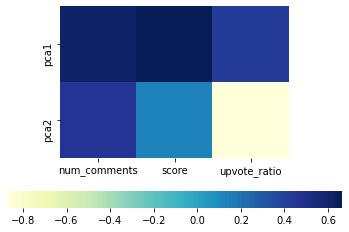

In [28]:
import seaborn as sns

heatmap = sns.heatmap(pipe['pca'].components_,
                 cmap='YlGnBu',
                 yticklabels=[ 'pca1','pca2'],
                 xticklabels=list(outputs.columns),
                 cbar_kws={"orientation": "horizontal"})
heatmap.set_aspect("equal")


In [33]:
#time mod days (convert in eastern time)


Sub['time_in_a_day'] = (Sub['time_created']-14400)%86400

In [34]:
Sub['time_in_a_day']

l8rf4k    50438.0
l6wu59    34834.0
l78uct    61583.0
l846a1    61485.0
l6x130    35351.0
           ...   
nfa216    32286.0
nfbwv5    37193.0
nfjo84    55440.0
nfkn43    57723.0
nfqs26    73288.0
Name: time_in_a_day, Length: 141, dtype: object

In [37]:
#time in a day (hour)
Sub['time_mod_hour'] = Sub['time_in_a_day']/3600

In [38]:
Sub['time_mod_hour']

l8rf4k    14.010556
l6wu59     9.676111
l78uct    17.106389
l846a1    17.079167
l6x130     9.819722
            ...    
nfa216     8.968333
nfbwv5    10.331389
nfjo84         15.4
nfkn43    16.034167
nfqs26    20.357778
Name: time_mod_hour, Length: 141, dtype: object